In [1]:
import numpy as np
import random
import string
import matplotlib.pyplot as plt
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna
plotsize=20

# Problem 1:
Construct two sequences with equal length of 100 nt by choosing A, U, G, C randomly; then produce a dot plot. Find the most similar region of the aligned sequences.

## Part 1.1:
Construct two sequences with equal length of 100 nt by choosing A, U, G, C randomly then then produce a dot plot. 

In [2]:
#contruction of sequence

lst = list(["A","U","G","C"]) #each letter represents Alanine, Glycine, Cysteine and Threonine.
n=100

#generate sequence of 100nt
String1 = "".join(random.choice(lst) for i in range(n))
String2 = "".join(random.choice(lst) for i in range(n))
seq1 = Seq(String1, generic_dna)
seq2 = Seq(String2, generic_dna)

print("Sequence 1=",seq1)
print("Sequence 2=",seq2)

Sequence 1= CAACCAUAUAUUCGAUUUCAUUGGGAGCCGGGGGACCACAGCCAGUGAGUGGGACUUUACCCCGUGCCUUGGAGUGGUGUGUACAGGUUGCCGGUCUCGA
Sequence 2= UGGCGUCUCAUGUGUACGUCUGAAUGGAACAAUGGCGGUUUGACCAUCGAGCCUACCGGUAACAGGCUCGCUCACGCGCGCGGAGCCAAGUAUUAGGGAC


In [3]:
"""seq1='gccuugcccc'
seq2='gucgugauca'
seq1=seq1.upper()
seq2=seq2.upper()
print("Sequence 1=",seq1)
print("Sequence 2=",seq2)""";

In [4]:
l1=list(seq1)
l2=list(seq2)
xlist=[]
ylist=[]

#loop that match nt of 1 sequence to another sequence
for i in range(len(l1)):        
        for j in range(len(l2)):
            if(l1[i]==l2[j]):                
                xlist.append(i)
                ylist.append(j)

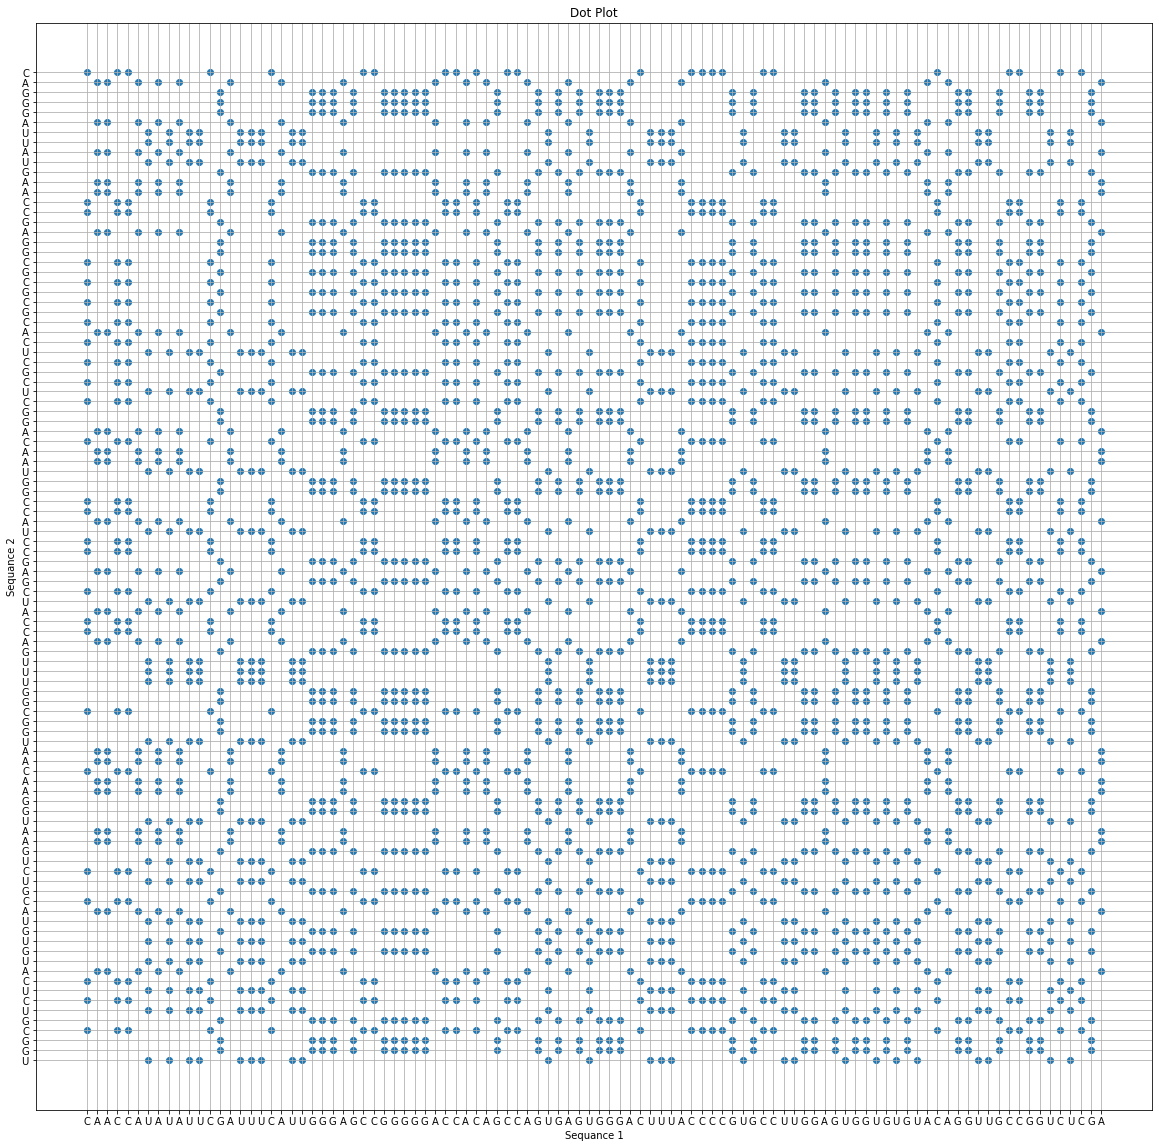

In [5]:
#dot-plot 

f = plt.figure(figsize=(plotsize,plotsize))
plt.scatter(xlist,ylist)

xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
yt=plt.yticks(np.arange(len(list(seq2))),list(seq2))


plt.xlabel("Sequance 1")
plt.ylabel("Sequance 2")
plt.title("Dot Plot")
plt.grid()
plt.savefig('dotplot.jpg',dpi=300)
plt.show()

## Part 2:
Find the most similar region of the aligned sequences.

In [6]:
#this cell will check and return (x) regions of two sequence
l1=list(seq1)
l2=list(seq2)
xlist=[]
ylist=[]
for i in range(len(l1)):        
            if(l1[i]==l2[i]):                
                xlist.append(i)                

In [7]:
def groupSequence(lst): 
    res = [[lst[0]]] 
    for i in range(1, len(lst)): 
        if lst[i-1]+1 == lst[i]: 
            res[-1].append(lst[i]) 
        else: 
            res.append([lst[i]]) 
    return res 

In [8]:
#this find most similar region
temp=[len(i) for i in groupSequence(xlist)]
maxpos = temp.index(max(temp))  

seq3=[seq1[i] for i in groupSequence(xlist)[maxpos]]
region="".join(seq3)
print(region)

AU


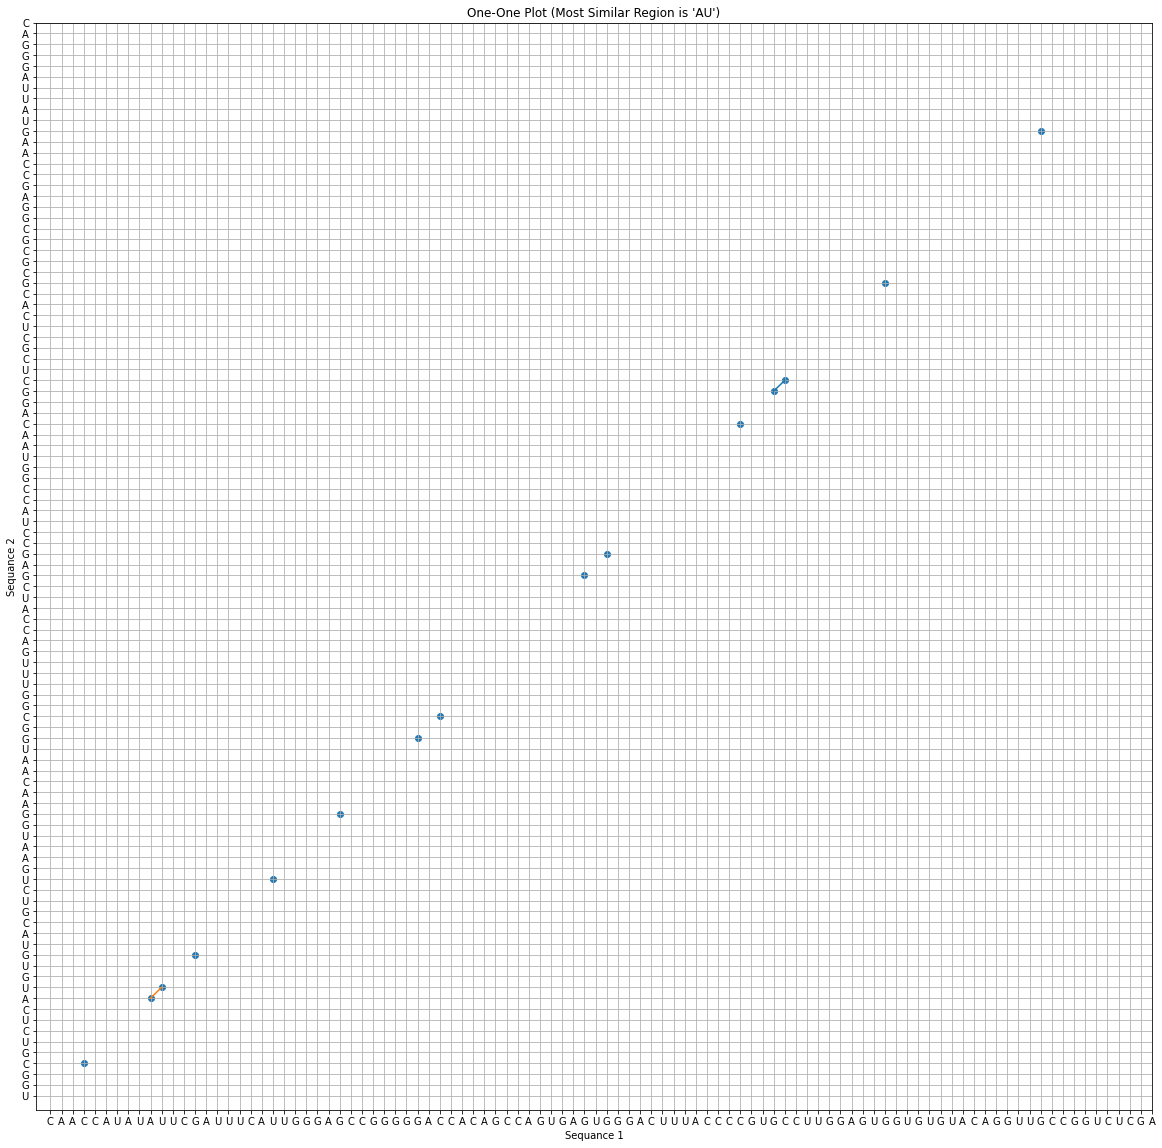

In [9]:
#plot 1-1 plot with similar regions

f = plt.figure(figsize=(plotsize,plotsize))
plt.scatter(xlist,xlist)

for i in groupSequence(xlist):    
    plt.plot(i,i)

xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
yt=plt.yticks(np.arange(len(list(seq2))),list(seq2))


plt.xlabel("Sequance 1")
plt.ylabel("Sequance 2")
plt.title("One-One Plot (Most Similar Region is '{}')".format(region))
plt.grid()
plt.savefig('oneoneplot.jpg',dpi=300)
plt.show()

# Problem 2:
Using sliding window methods (window size is 10nt and cut-off value is 8), produce a dot plot of these two sequences. Then increase the window size to 20 nt and then show the effects on the similarity regions.

In [10]:
#it will subdivide the sequence into windows of given window size
def subsequence(ws):
    l1=list(seq1)
    l2=list(seq2)

    seq11 = ["".join(l1[i:i+ws]) for i in range(0, len(l1)) if(len(l1[i:i+ws])==ws)] 
    seq22 = ["".join(l2[i:i+ws]) for i in range(0, len(l2)) if(len(l2[i:i+ws])==ws)] 
    return (seq11,seq22)    

In [11]:
#it will match 1 window of sequence 1 to another window of sequence 2
def matchNT(seq11,seq22,ws,cutoff):
    x=[]
    y=[]
    for i in range(len(seq11)):    
        for j in range(len(seq22)):
            count=0    
            for k in range(ws):
                #print(i,j,seq11[i],seq22[j])
                if(seq11[i][k]==seq22[j][k]):
                    count+=1
            if(count>=cutoff):
                #print(seq11[i],seq22[j])
                x.append(seq11.index(seq11[i]))
                y.append(seq22.index(seq22[j]))
    return (x,y)

In [20]:
#dot plot of windows of between two sequences
def dotplot(x,y):
    filename="oneoneplot(windowsize {}).jpg".format(windowsize)
    f = plt.figure(figsize=(plotsize,plotsize))
    plt.scatter(x,y)

    xt=plt.xticks(np.arange(len(list(seq11))),list(seq11),rotation=90)
    yt=plt.yticks(np.arange(len(list(seq22))),list(seq22))

    plt.xlabel("Sequance 1")
    plt.ylabel("Sequance 2")
    plt.title("Window size = {}, thresold={}".format(windowsize,thresold))
    plt.grid()
    plt.tight_layout()
    plt.savefig(filename,dpi=300)
    plt.show()                

### (window size is 10nt and cut-off value is 8) then dot plot

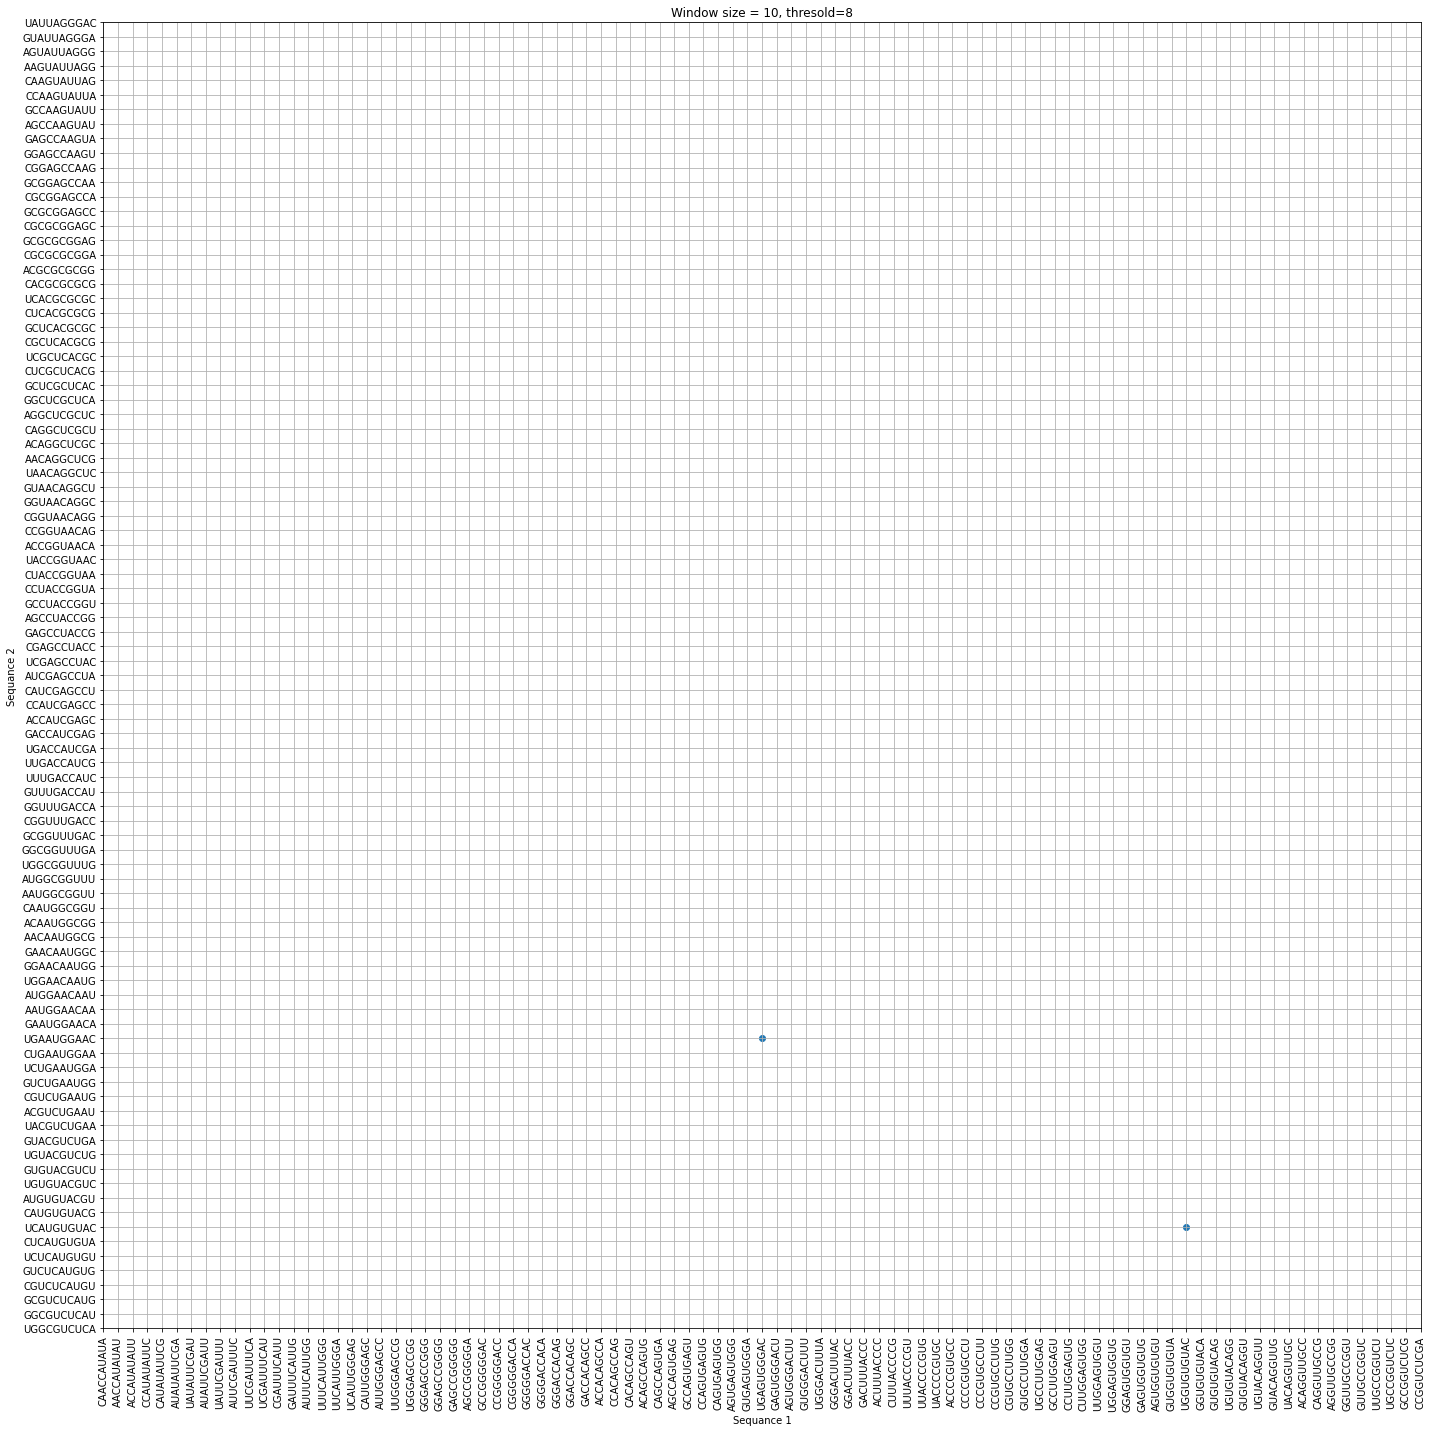

In [21]:
windowsize=10
thresold=8 #cut-off value
seq11,seq22=subsequence(windowsize)
#print(seq11)
#print(seq22)
x,y=matchNT(seq11,seq22,windowsize,thresold)
dotplot(x,y)

### (window size is 20nt and cut-off value 8 then dot plot

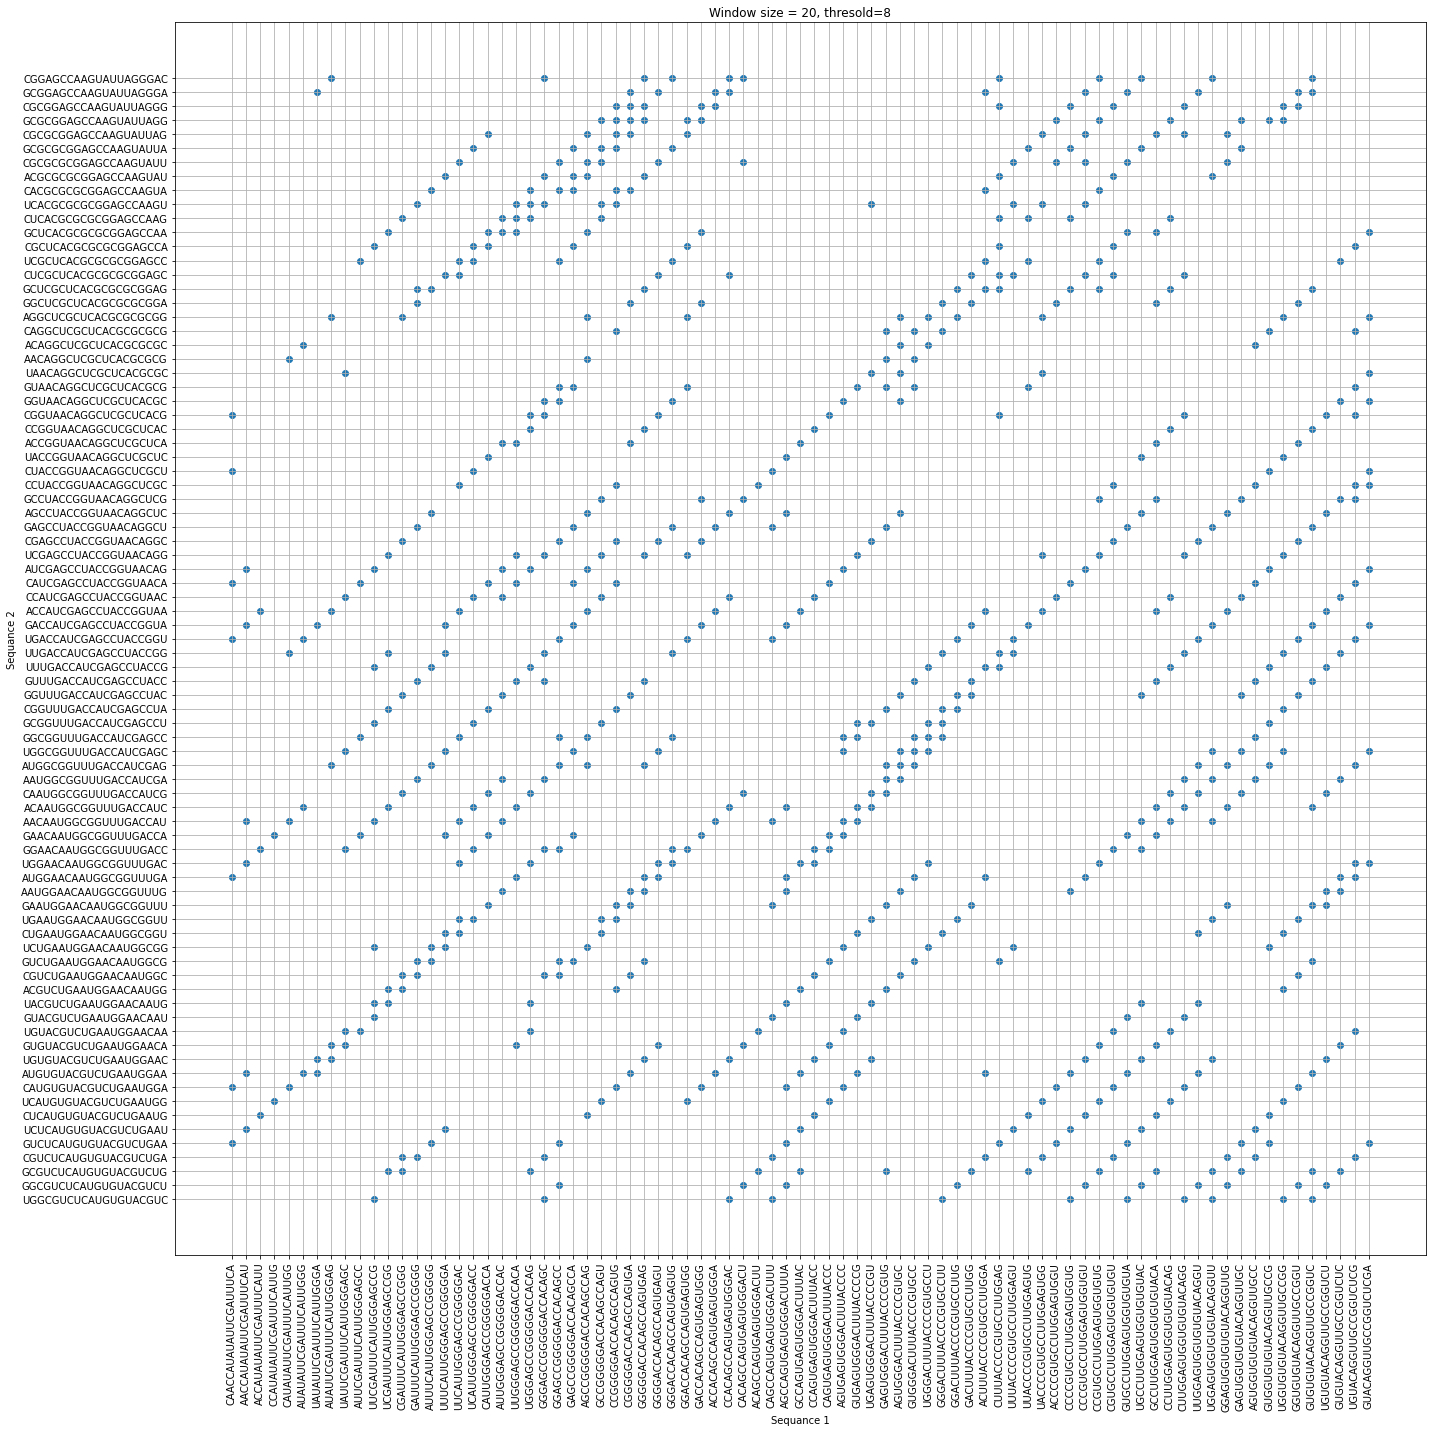

In [22]:
windowsize=20
thresold=8 #cut-off value
seq11,seq22=subsequence(windowsize)
#print(seq11)
#print(seq22)
x,y=matchNT(seq11,seq22,windowsize,thresold)
dotplot(x,y)